In [1]:
#Connect to google drive...for any file requirement
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import os

Mounted at /content/drive


In [ ]:
#Import flower data set

In [2]:
pip install tflearn

     |████████████████████████████████| 112kB 8.7MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=e4f618ef2ae8b74d14884edbf001392479710aa5be952406d3ca2eb90edd49f0
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [3]:
from tflearn.datasets import oxflower17
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
X, y = oxflower17.load_data(one_hot=False)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
X.shape

(1360, 224, 224, 3)

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
y.shape

(1360,)

In [ ]:
np.unique(y)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

Dimensions of data 
- The data set has 1360 number of records
- Each record corresponds to single image data and each image has 224*224*3 values (224 * 224 pixels and each pixel has RGB values) 
- So each image is represented in terms of 224*224*3 pixels = 150528...thus there are 150528 pixels and all these represent dimension/feature 
- There are 17 different classes among which images are classified**

Data Visualiation
Display images, labels

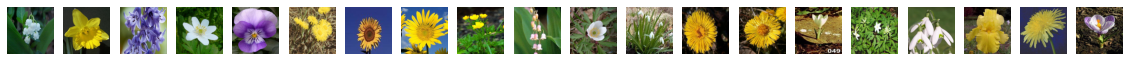

Class for each of the above image: [ 9  0 10  7  8  3 16 16  6  9  7  1  3  3 11  7  1 12  4 11]


In [ ]:
plt.figure(figsize=(20, 1))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Class for each of the above image: %s' % (y[0:20]))

**Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and
display the image.**

In [5]:
from PIL import Image, ImageFilter

In [ ]:
# Lets pick up any one image
Image_0_002 = Image.open("/content/17flowers/jpg/0/image_0002.jpg") 

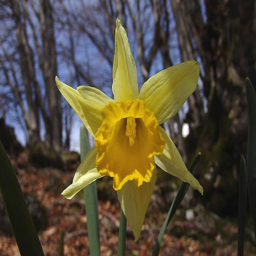

In [ ]:
Image_0_002 = Image_0_002.resize([256,256])
Image_0_002

Lets apply different filters and see image

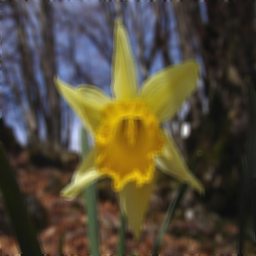

In [ ]:
Image_0_002_blur = Image_0_002.filter(ImageFilter.BLUR)
Image_0_002_blur

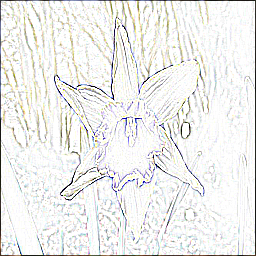

In [ ]:
Image_0_002_blur_contour = Image_0_002.filter(ImageFilter.CONTOUR)
Image_0_002_blur_contour

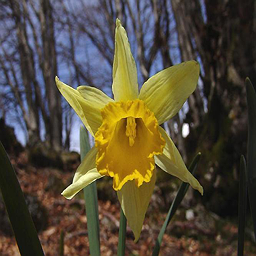

In [ ]:
Image_0_002_detail = Image_0_002.filter(ImageFilter.DETAIL)
Image_0_002_detail

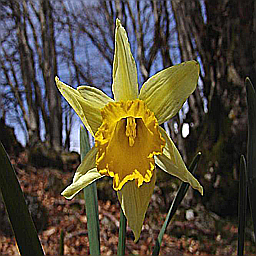

In [ ]:
Image_0_002_EdgeEnhance = Image_0_002.filter(ImageFilter.EDGE_ENHANCE) 
Image_0_002_EdgeEnhance

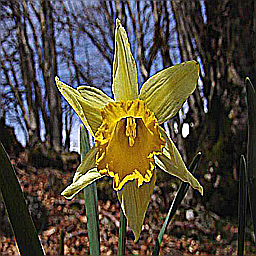

In [ ]:
Image_0_002_EdgeEnhancemore = Image_0_002.filter(ImageFilter.EDGE_ENHANCE_MORE) 
Image_0_002_EdgeEnhancemore

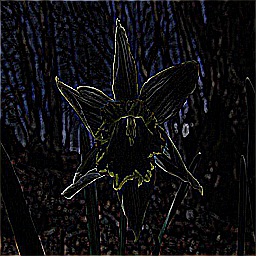

In [ ]:
Image_0_002_Edges = Image_0_002.filter(ImageFilter.FIND_EDGES) 
Image_0_002_Edges

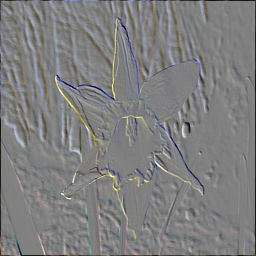

In [ ]:
Image_0_002_Emboss = Image_0_002.filter(ImageFilter.EMBOSS) 
Image_0_002_Emboss

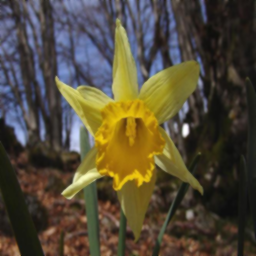

In [ ]:
Image_0_002_smooth = Image_0_002.filter(ImageFilter.SMOOTH) 
Image_0_002_smooth

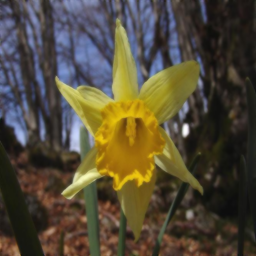

In [ ]:
Image_0_002_smoothmore = Image_0_002.filter(ImageFilter.SMOOTH_MORE) 
Image_0_002_smoothmore

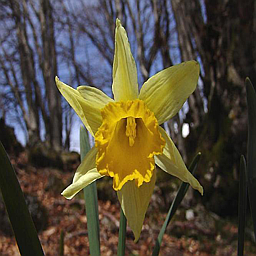

In [ ]:
Image_0_002_sharpen = Image_0_002.filter(ImageFilter.SHARPEN) 
Image_0_002_sharpen

**Preprocessing the data**

In [ ]:
#Check for null values
np.isnan(X).sum()

0

In [ ]:
# Check how many unique records are there
unique_rows = np.unique(X, axis=0)

In [ ]:
unique_rows.shape

(1360, 224, 224, 3)

There are 1360 unique records and the size of dataset is 1360....so every record is unique

In [ ]:
(unique, counts) = np.unique(y, return_counts=True)

In [ ]:
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
counts

array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80])

Each class has 80 images

**Train and test model using Supervised learning models**

1) Lets first try with KNN model

In [ ]:
#Lets spli X and y data set into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

X, y = oxflower17.load_data(one_hot=False)

target = y
features = X
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3, random_state=10)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train.reshape(X_train.shape[0], 150528)
X_test = X_test.reshape(X_test.shape[0], 150528)

#X_train = X_train / 255.0
#X_test = X_test / 255.0

# Let do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
NoOfClasses = y_test.shape[1]

In [ ]:
error =[]
neighbours = []

def KNN(k):
    from sklearn.neighbors import KNeighborsClassifier
    knnmodel = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    knnmodel.fit(X_train, y_train)
    predicted_labels = knnmodel.predict(X_train)    
    score = accuracy_score(y_train, predicted_labels)
    MSE = 1-score
    error.append(MSE)
    neighbours.append(k)
    print(score)

In [ ]:
for i in range(1,10,2):
    KNN(i)

1.0
0.4527310924369748
0.28991596638655465
0.21428571428571427
0.16701680672268907


2) Lets use SVM model

In [ ]:
#Lets spli X and y data set into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

X, y = oxflower17.load_data(one_hot=False)

target = y
features = X


In [ ]:
features = features.reshape(features.shape[0], 150528)

In [ ]:
scalar = StandardScaler()
features_tran = scalar.fit_transform(features)
pca = PCA(n_components=500)
features_pca = scalar.fit_transform(features_tran)
# look at new shape
print('PCA matrix shape is: ', features_pca.shape)

PCA matrix shape is:  (1360, 150528)


In [ ]:
X = pd.DataFrame(features_pca)
y = pd.Series(y)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1010)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

3     63
6     61
13    61
12    61
16    59
1     59
0     58
9     56
15    56
10    55
5     55
14    54
4     53
8     53
11    50
7     49
2     49
dtype: int64

In [ ]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Make predictions
y_pred = svm.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy : ', accuracy)

Model accuracy :  0.4877450980392157


**Train and test model using ANN model**

In [ ]:
#Lets spli X and y data set into train and test
from sklearn.model_selection import train_test_split
from sklearn import metrics

target = y
features = X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3, random_state=10)

In [ ]:
# Let do normlization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Let do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
NoOfClasses = y_test.shape[1]

In [ ]:
#Let build ANN model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.activations import relu
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Lets build model - Model -1 (ANN No-1)
tf.keras.backend.clear_session()

model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))       #Flatten image of size 224*224*3 into an array of 150528
model.add(Dense(400,activation='relu', input_shape=(150528,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
#model.add(Dense(500,activation='relu'))
#model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(NoOfClasses, activation='softmax'))
Epochs = 30
Batchsize = 40

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
CallbackList = [earlyStopping]

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 400)               60211600  
_________________________________________________________________
dense_1 (Dense)              (None, 500)               200500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                8517      
Total params: 60,671,117
Trainable params: 60,671,117
Non-trainable params: 0
____________________________________________

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=Epochs, batch_size=Batchsize, callbacks=CallbackList)

Train on 952 samples, validate on 408 samples
Epoch 1/30
952/952 [==============================] - ETA: 0s - loss: 2.7737 - acc: 0.1082

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


952/952 [==============================] - 9s 10ms/sample - loss: 2.7737 - acc: 0.1082 - val_loss: 2.5009 - val_acc: 0.1912
Epoch 2/30
952/952 [==============================] - 8s 9ms/sample - loss: 2.3067 - acc: 0.1975 - val_loss: 2.1020 - val_acc: 0.2623
Epoch 3/30
952/952 [==============================] - 9s 9ms/sample - loss: 2.0749 - acc: 0.2605 - val_loss: 2.0245 - val_acc: 0.2696
Epoch 4/30
952/952 [==============================] - 9s 9ms/sample - loss: 1.9235 - acc: 0.2952 - val_loss: 1.9118 - val_acc: 0.2843
Epoch 5/30
952/952 [==============================] - 9s 9ms/sample - loss: 1.8085 - acc: 0.3414 - val_loss: 1.8378 - val_acc: 0.3015
Epoch 6/30
952/952 [==============================] - 8s 9ms/sample - loss: 1.6235 - acc: 0.3939 - val_loss: 1.7912 - val_acc: 0.3456
Epoch 7/30
952/952 [==============================] - 8s 9ms/sample - loss: 1.4383 - acc: 0.5000 - val_loss: 1.6941 - val_acc: 0.4216
Epoch 8/30
952/952 [==============================] - 8s 9ms/sample - lo

**Train and test model using CNN model**

In [ ]:
from tflearn.datasets import oxflower17
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D

X, y = oxflower17.load_data(one_hot=False)

target = y
features = X
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3, random_state=10)

# Let do normlization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train = X_train / 255.0
#X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0],224,224,3)
X_test = X_test.reshape(X_test.shape[0],224,224,3)

# Let do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [ ]:
# Lets build model based CNN
tf.keras.backend.clear_session()
#Initialise model
modelcnn = tf.keras.models.Sequential()
#1st convolutional layer
modelcnn.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#2nd convolutional layer
#modelcnn.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'))
#3rd convolutional layer
modelcnn.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))

modelcnn.add(Dropout(0.25))

#Add max pool layer
modelcnn.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the output
modelcnn.add(tf.keras.layers.Flatten())
#fully connected layer
modelcnn.add(tf.keras.layers.Dense(64, activation='relu'))
#Output layer
modelcnn.add(tf.keras.layers.Dense(17, activation='softmax'))

modelcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list=[early_stopping]

#Saving the best model using model checkpoint callback
modelcnn_checkpoint=tf.keras.callbacks.ModelCheckpoint('oxflower17_cnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

modelcnn.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=30, batch_size=128, callbacks=[modelcnn_checkpoint])

print(modelcnn.summary())

Train on 952 samples, validate on 408 samples
Epoch 1/30
952/952 [==============================] - ETA: 0s - loss: 20.3938 - acc: 0.0662

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


952/952 [==============================] - 176s 185ms/sample - loss: 20.3938 - acc: 0.0662 - val_loss: 2.9182 - val_acc: 0.0907
Epoch 2/30
952/952 [==============================] - 164s 172ms/sample - loss: 2.7776 - acc: 0.1218 - val_loss: 2.6794 - val_acc: 0.1789
Epoch 3/30
952/952 [==============================] - 167s 175ms/sample - loss: 2.3504 - acc: 0.2668 - val_loss: 2.4393 - val_acc: 0.2794
Epoch 4/30
952/952 [==============================] - 168s 177ms/sample - loss: 1.5783 - acc: 0.5504 - val_loss: 2.0578 - val_acc: 0.3922
Epoch 5/30
952/952 [==============================] - 167s 175ms/sample - loss: 0.7801 - acc: 0.8015 - val_loss: 1.7772 - val_acc: 0.4485
Epoch 6/30
952/952 [==============================] - 167s 175ms/sample - loss: 0.3237 - acc: 0.9191 - val_loss: 1.8842 - val_acc: 0.4461
Epoch 7/30
952/952 [==============================] - 170s 179ms/sample - loss: 0.1176 - acc: 0.9758 - val_loss: 1.9601 - val_acc: 0.4975
Epoch 8/30
952/952 [========================

In [ ]:
modelcnn.save('/content/drive/MyDrive/LablFiles/ANN_Project_2/oxflower17_cnn.h5')

The model is stored on google drive and has size of 567 mb

In [ ]:
_,acc=modelcnn.evaluate(X_test,y_test)
print(acc*100)

55.88235259056091


 **CNN model with transfer learning - Lets use ResNet50**

In [ ]:
from tflearn.datasets import oxflower17
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D

X, y = oxflower17.load_data(one_hot=False)

target = y
features = X
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.3, random_state=10)

# Let do normlization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train = X_train / 255.0
#X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0],224,224,3)
X_test = X_test.reshape(X_test.shape[0],224,224,3)

# Let do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [ ]:
def normalize_data(img):
    #Normalize for ResNet50
    return tf.keras.applications.resnet50.preprocess_input(img)

In [ ]:
img_size = 224
img_depth = 3

Create batch generator

In [ ]:
#Define Training Data Generator with augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                preprocessing_function=normalize_data) 

#Define Test Data Generator with NO augmentations
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_data) 

In [ ]:
#Training (from dataframe)
train_generator = train_datagen.flow( X_train,
                                     y_train,                                                                     
                                     batch_size=64)

In [ ]:
#Test (from dataframe)
test_generator = test_datagen.flow(X_test,
                                   y_test,                                                                                                                     
                                   batch_size=64)

Lets load pretarined model

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(img_size, img_size,3),
                                       weights='imagenet')

94773248/94765736 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#Lets check number of layers
len(model.layers)

175

In [ ]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

Add layer for output

In [ ]:
#get Output layer of Pre0trained model
x1 = model.output

#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

In [ ]:
#Add output layer
prediction = tf.keras.layers.Dense(17,activation='softmax')(x2)

In [ ]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [ ]:
#Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('oxflower17.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
final_model.fit(train_generator,
                epochs=10,
                steps_per_epoch= X_train.shape[0]/64,
                validation_data=test_generator,
                validation_steps = X_test.shape[0]/64, 
                callbacks=[model_checkpoint])

Epoch 1/10
15/14 [==============================] - ETA: -1s - batch: 7.0000 - size: 63.4667 - loss: 2.6022 - acc: 0.2038

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


14/14 [==============================] - 248s 16s/step - batch: 7.0000 - size: 63.4667 - loss: 2.6036 - acc: 0.2038 - val_loss: 3.5330 - val_acc: 0.0588
Epoch 2/10
14/14 [==============================] - 242s 17s/step - batch: 7.0000 - size: 63.4667 - loss: 1.6771 - acc: 0.5504 - val_loss: 3.6534 - val_acc: 0.0588
Epoch 3/10
14/14 [==============================] - 236s 16s/step - batch: 7.0000 - size: 63.4667 - loss: 1.2447 - acc: 0.6702 - val_loss: 3.7820 - val_acc: 0.0441
Epoch 4/10
14/14 [==============================] - 242s 17s/step - batch: 7.0000 - size: 63.4667 - loss: 1.0102 - acc: 0.7447 - val_loss: 3.8444 - val_acc: 0.0588
Epoch 5/10
14/14 [==============================] - 247s 17s/step - batch: 7.0000 - size: 63.4667 - loss: 0.8761 - acc: 0.7889 - val_loss: 3.8766 - val_acc: 0.0588
Epoch 6/10
14/14 [==============================] - 240s 16s/step - batch: 7.0000 - size: 63.4667 - loss: 0.8066 - acc: 0.7994 - val_loss: 3.9119 - val_acc: 0.0466
Epoch 7/10
14/14 [=========

In [ ]:
final_model.save('/content/drive/MyDrive/LablFiles/ANN_Project_2/oxflower17_transfer.h5')

Comparing results of different models...

1) Supervised Models : 
1a) KNN - The accuracy is quite poor. Based on the result in above section, the accuracy descreases from 45 % (for 2 classes) to 16 % (for classes).
       The accuracy for 17 classes will be extraemly poor.
1b) SVM : Test accuracy is 48 %
 
2) Dense layer model (Typical ANN model)
- Tried with adding multiple (3-5) dense layers with 300-500 neurons
- With 3 Dense Layers (400,500,500) and 'adam' optimizer model is giving 
Training accurtacy = 65 % and validation accuracy = 50 %
- With 4 Dense layers (400,500,500,500) 'adam' optimizer model is giving 
Training accurtacy = 72 % and validation accuracy = 40 %
- With 5 Dense layers (400,500,500,500,500) 'adam' optimizer model is giving Training accurtacy of around 50 % and validation accuracy around 32 %
Observation...
1) Thus there is huge difference between training and validation accuracy suggesting model is overfitting.
2) Also adding more dense layer and neurons is resulting in reduction of training/validation accuracy.
3) With different dense layers training accuracy is going upto 85 % but validation accuracy is not crossing 50%

3) CNN model
The training accuracy is going upto 100 % and test accuracy of 55.88%. However such huge difference shows overfitting

4) Transfer learning model - ResNet50
The training accuracy is reaching around 83 %. However test accuracy is very poor...5 %. This is highly overfitted model and can not be used for production deployment



Lets predict classes for some image files using CNN model (oxflower17_cnn.h5) stored on disk.

In [ ]:
from tensorflow.keras.models import load_model
cnnmodel = load_model('/content/drive/MyDrive/LablFiles/ANN_Project_2/oxflower17_cnn.h5')

In [ ]:
results={
   0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',
   10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16'
}

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from PIL import Image
import numpy as np

def predictclass(filepath) :
  img=Image.open(filepath)
  img=img.resize((224,224))
  img=np.expand_dims(img,axis=0)
  img=np.array(img)
  img = img.astype('float32')
  img = img.reshape(img.shape[0],224,224,3)
  pred=cnnmodel.predict_classes([img])[0]
  return pred

Lets do prediction for some image files from

In [ ]:
filepath ="/content/17flowers/jpg/1/image_0081.jpg" # class-1 
flowerclass= predictclass(filepath)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(flowerclass, results[flowerclass])

1 1


In [ ]:
filepath ="/content/17flowers/jpg/1/image_0088.jpg" # class-1 
flowerclass= predictclass(filepath)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(flowerclass, results[flowerclass])

1 1


In [ ]:
filepath ="/content/17flowers/jpg/15/image_1205.jpg" # class-15
flowerclass= predictclass(filepath)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(flowerclass, results[flowerclass])

7 7


In [ ]:
filepath ="/content/17flowers/jpg/13/image_1049.jpg" # class-13
flowerclass= predictclass(filepath)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(flowerclass, results[flowerclass])

5 5


For GUI application refer file ''

Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

Worflow to maintain and support AIML image classfier is as below

1) Build model using given image dataset.
2) Save model in .h5 format
3) Using Flask web framework create web service (json based) to pass image.
4) The web service application will accept image and will conevrt image into array as shown in above function 'predictclass'
5) Load the model from '.h5' file
6) Predict class and return it as return value of web service function.

Phase-1 : 

1) HUman/SME will be given GUI application to submit image. The predicated class is shown to human/SME to judge if predicted class is correct or not.
2) If predicated class is incorrect, then pass the details for model correction.

Phase-2

1) Once a desired level of accuracy is acheived then feedback loop from human/SME can be removed.


In [15]:
from PIL import Image, ImageFilter

In [17]:

image1 = Image.open("/content/drive/MyDrive/LablFiles/ANN_Project_2/Model.PNG") 

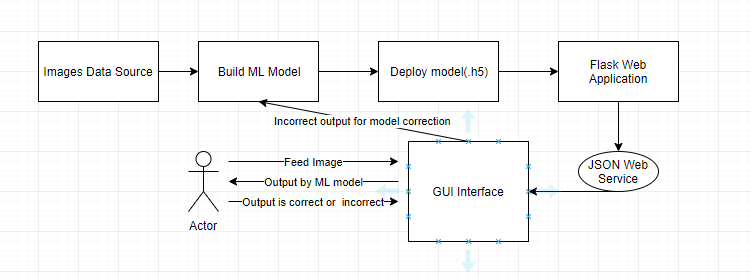

In [18]:
image1 # Below workflow shows strategy to deploy model in production environment